# 1. Business Understanding

The audio streaming service was founded in 2006 by Swedish startup Spotify Technology S.A., and is available in more than 90 different countries. For the Spotify company, one of the most important potentials and challenges is to compile a unique personalized playlist for each user that matches the listener's music taste. Consideration is given to solving the above challenges by using Spotify AI and machine learning algorithms to generate a customized playlist for the user.
The overarching question of this case study is: How are machine learning technologies used at Spotify to improve the customer's listening experience?

# 2. Data and Data Understanding

The collected data for Spotify is merged into a unified data set and checked for the problem to see if insights can be extracted from the information. The attributes have different ranges. This data is carefully prepared so that the final dataset can be created or processed using data mining methods. For this purpose, the data is loaded and analyzed. Subsequently, these in turn form the basis for the next phase of modeling.

## 2.1 Import of Relevant Modules

In [3]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
# from project_lib import Project
# project = Project(project_id='148a63b8-8cd0-4ae9-acd7-382d6f8da2d1', project_access_token='p-b4ba4eff97677a6d061b1f9eb562ffce54a4e527')
# pc = project.project_context

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## 2.2 Read Data

In [10]:
#Fetch the local file
# my_file = project.get_file("data.csv")

#Read the CSV data file from the object storage into a pandas DataFrame
#my_file.seek(0)

#raw_data = pd.read_csv(my_file)
raw_data = pd.read_csv("https://storage.googleapis.com/ml-service-repository-datastorage/Generation_of_Individual_Playlists_Generation-of-Individual-Playlists-data.csv")

raw_data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [11]:
#raw_data.head(5)

In [12]:
#descriptive statistics for all columns
raw_data.describe(include = 'all')

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653,170653.000000,1.706530e+05,170653.000000,170653.000000,170653,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653,170653.000000,170653,170653.000000,170653.000000
unique,NaN,NaN,NaN,34088,NaN,NaN,NaN,NaN,170653,NaN,NaN,NaN,NaN,NaN,133638,NaN,11244,NaN,NaN
top,NaN,NaN,NaN,['Эрнест Хемингуэй'],NaN,NaN,NaN,NaN,6Af5jOEKb2bef8XE74ptnw,NaN,NaN,NaN,NaN,NaN,White Christmas,NaN,1945,NaN,NaN
freq,NaN,NaN,NaN,1211,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,73,NaN,1446,NaN,NaN
mean,0.528587,1976.787241,0.502115,NaN,0.537396,2.309483e+05,0.482389,0.084575,NaN,0.167010,5.199844,0.205839,-11.467990,0.706902,NaN,31.431794,NaN,0.098393,116.861590
std,0.263171,25.917853,0.376032,NaN,0.176138,1.261184e+05,0.267646,0.278249,NaN,0.313475,3.515094,0.174805,5.697943,0.455184,NaN,21.826615,NaN,0.162740,30.708533
min,0.000000,1921.000000,0.000000,NaN,0.000000,5.108000e+03,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,-60.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,NaN,0.415000,1.698270e+05,0.255000,0.000000,NaN,0.000000,2.000000,0.098800,-14.615000,0.000000,NaN,11.000000,NaN,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,NaN,0.548000,2.074670e+05,0.471000,0.000000,NaN,0.000216,5.000000,0.136000,-10.580000,1.000000,NaN,33.000000,NaN,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,NaN,0.668000,2.624000e+05,0.703000,0.000000,NaN,0.102000,8.000000,0.261000,-7.183000,1.000000,NaN,48.000000,NaN,0.075600,135.537000


## 2.3 Data Cleaning

In [13]:
# check for duplicate rows
raw_data[raw_data.duplicated(keep = False)]

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo


### Check for missing values

In [14]:
raw_data.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

### Select predictors

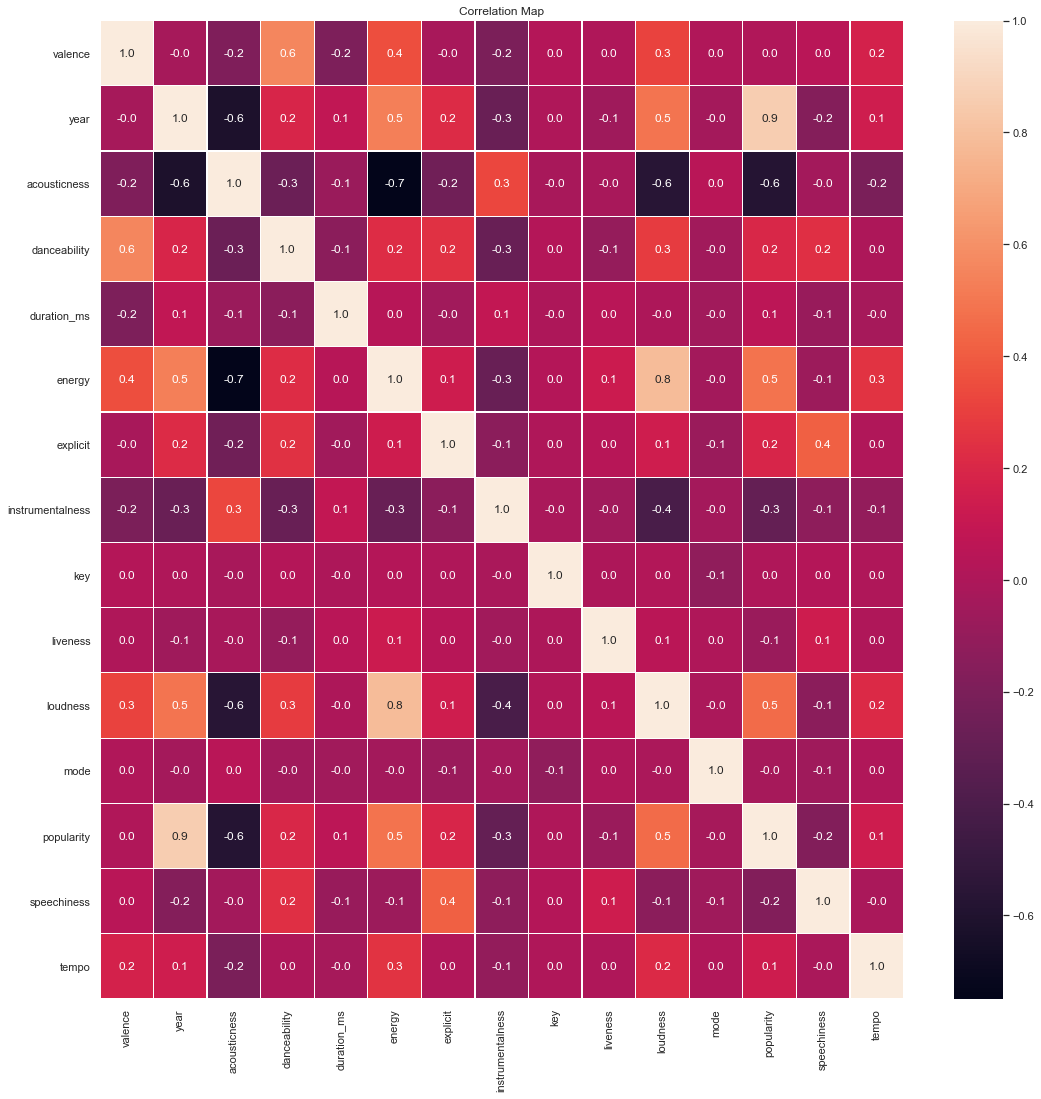

In [15]:
#predictive modeling
#plot a correlation matrix to find out which variables are correlated to each other
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(raw_data.corr(),annot= True,linewidths=0.2, fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

### Drop features

In [17]:
raw_data= raw_data.drop(['name', 'release_date'], axis=1)

In [18]:
raw_data = raw_data.drop(['id'], axis=1)

KeyError: "['id'] not found in axis"

In [19]:
raw_data = raw_data.drop(['artists', 'energy'], axis=1)

In [20]:
raw_data = raw_data.drop(['year'], axis=1)

In [21]:
raw_data.head()

,valence,acousticness,danceability,duration_ms,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
0,0.0594,0.982,0.279,831667,0,0.878000,10,0.665,-20.096,1,4,0.0366,80.954
1,0.9630,0.732,0.819,180533,0,0.000000,7,0.160,-12.441,1,5,0.4150,60.936
2,0.0394,0.961,0.328,500062,0,0.913000,3,0.101,-14.850,1,5,0.0339,110.339
3,0.1650,0.967,0.275,210000,0,0.000028,5,0.381,-9.316,1,3,0.0354,100.109
4,0.2530,0.957,0.418,166693,0,0.000002,3,0.229,-10.096,1,2,0.0380,101.665


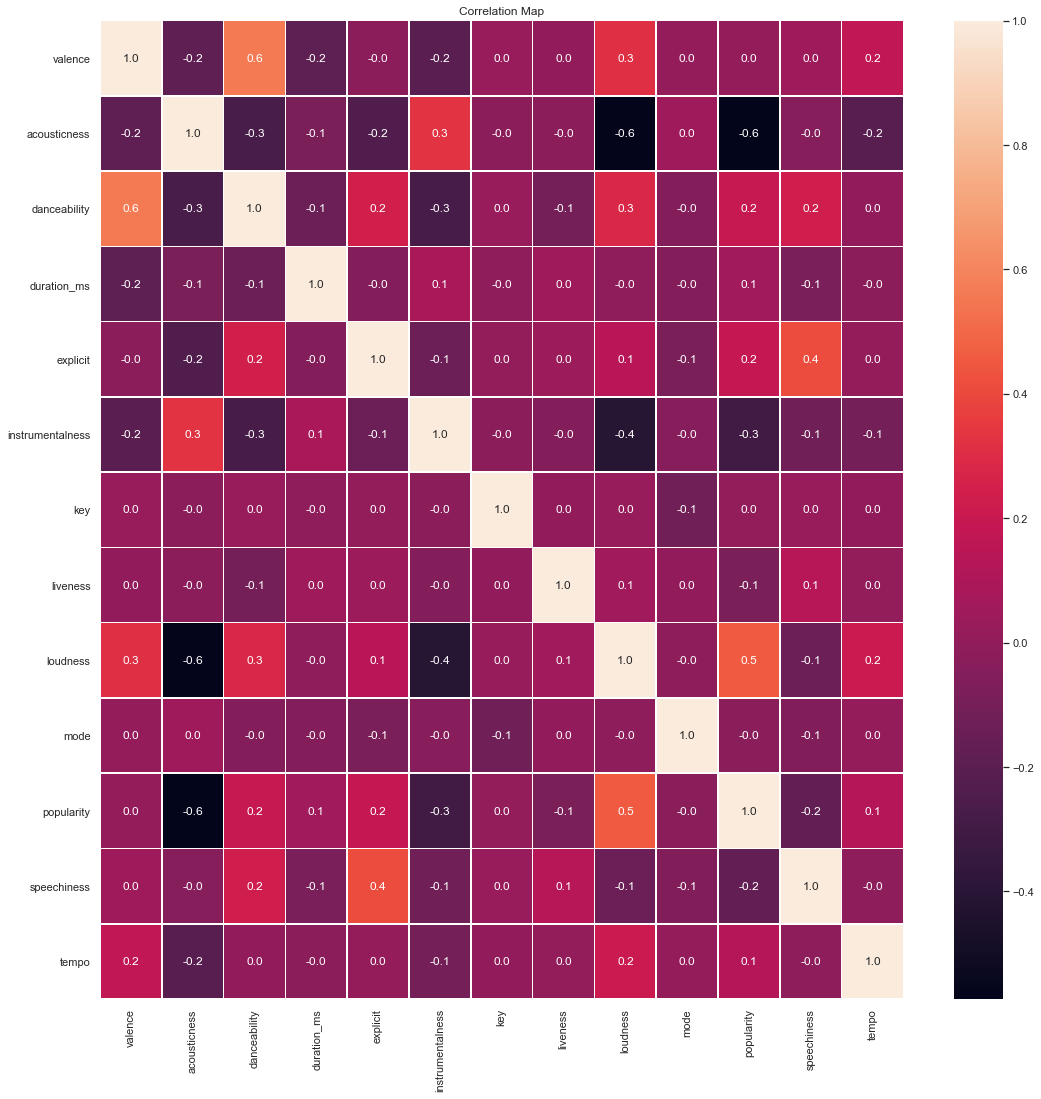

In [23]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(raw_data.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

array([[<AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'duration_ms'}>],
       [<AxesSubplot:title={'center':'explicit'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'liveness'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'speechiness'}>],
       [<AxesSubplot:title={'center':'tempo'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

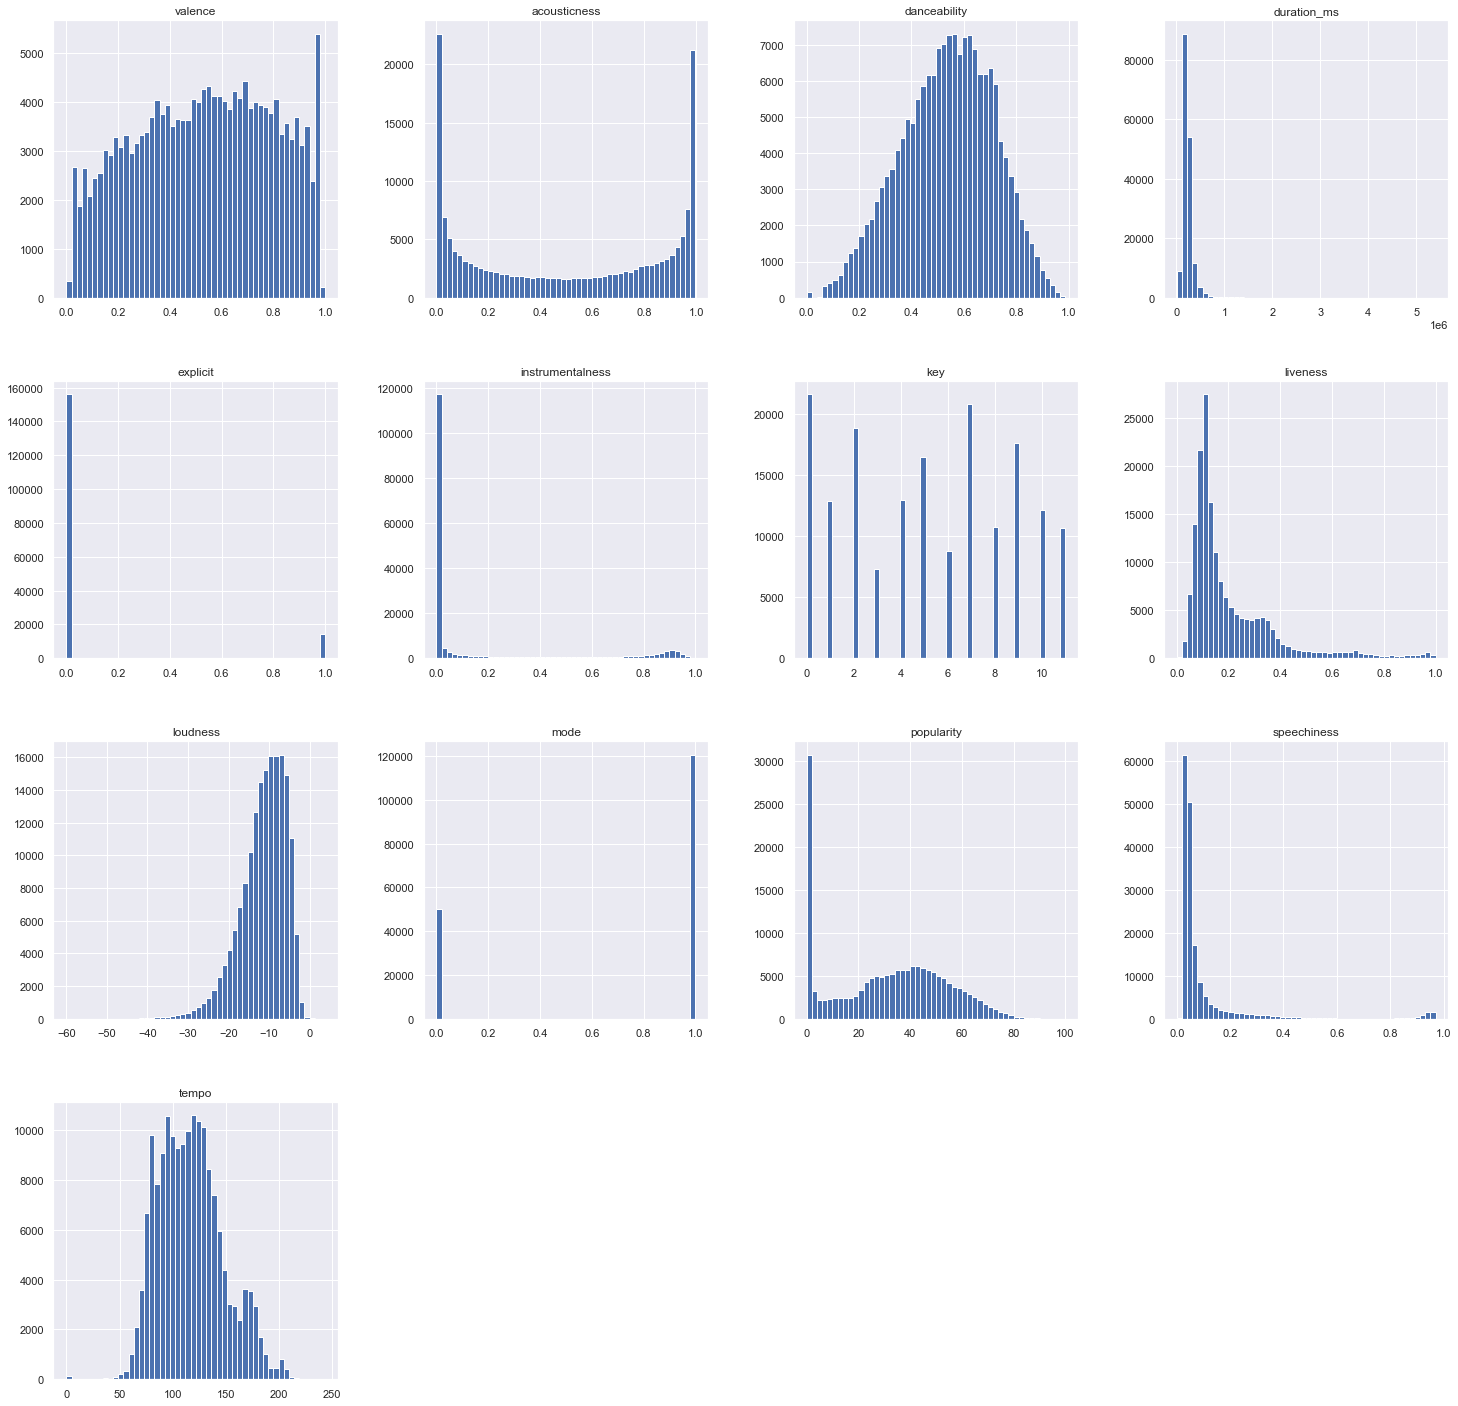

In [24]:
#Detect outliers and handle them
raw_data.hist(figsize=(25,25), bins=50)

In [25]:
#raw_data.describe()

# 3. Data Preparation

In [26]:
df_dummies = pd.get_dummies(raw_data, drop_first=True) # 0-1 encoding for categorical values
df_dummies.head()

,valence,acousticness,danceability,duration_ms,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
0,0.0594,0.982,0.279,831667,0,0.878000,10,0.665,-20.096,1,4,0.0366,80.954
1,0.9630,0.732,0.819,180533,0,0.000000,7,0.160,-12.441,1,5,0.4150,60.936
2,0.0394,0.961,0.328,500062,0,0.913000,3,0.101,-14.850,1,5,0.0339,110.339
3,0.1650,0.967,0.275,210000,0,0.000028,5,0.381,-9.316,1,3,0.0354,100.109
4,0.2530,0.957,0.418,166693,0,0.000002,3,0.229,-10.096,1,2,0.0380,101.665


# 4. Data Modeling

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [29]:
target = df_dummies['popularity']
predictors = df_dummies.drop(['popularity'], axis=1)

## 4.1 Test and Training sets

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=365)

### Standardize columns before using models

In [31]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 4.2 Linear Regression model and evaluation

In [33]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [34]:
print('training performance')
print(reg.score(X_train,y_train))
print('test performance')
print(reg.score(X_test,y_test))

training performance
0.44567392235354486
test performance
0.4477587073403365


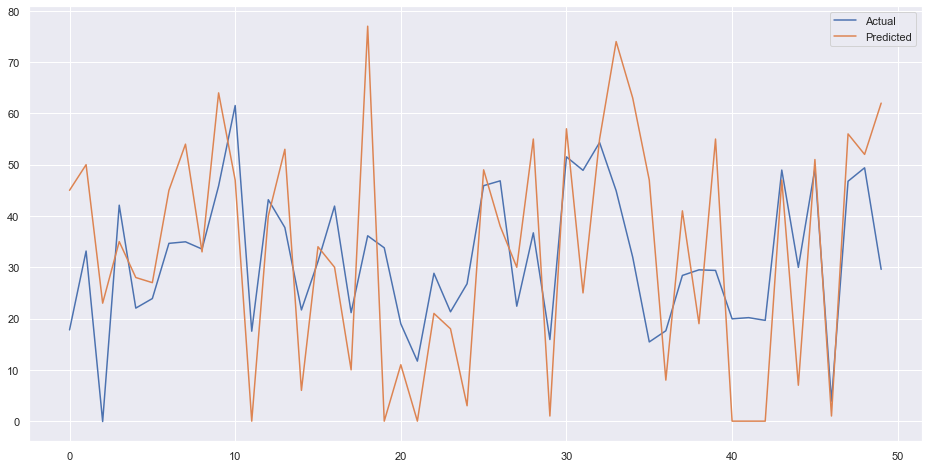

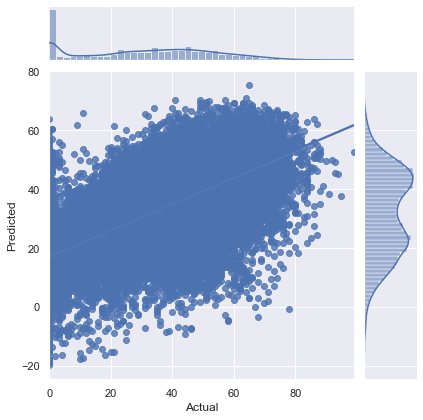

In [35]:
y_pred = reg.predict(X_test)
test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

# 4. Deployment

In [ ]:
# Wurde nicht durchgeführt, da es optional war